# 실습목표
- keras 도구 활용법 살펴보기
- 딥러닝을 이용한 모델링 프로세스 확인하기
- 데이터로드 > 전처리 > 학습 > 평가
- GPU환경 활용해보기

In [ ]:
# 현재 작업디렉토리 확인
!pwd

/content


In [ ]:
# 작업 디렉토리 변경
%cd "./drive/MyDrive/Colab Notebooks/딥러닝 기초 25.07.11 (class 2)"

/content/drive/MyDrive/Colab Notebooks/딥러닝 기초 25.07.11 (class 2)


In [ ]:
# 변경된 작업 디렉토리 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/딥러닝 기초 25.07.11 (class 2)


In [ ]:
# 현재 작업 디렉토리 내부 확인
!ls

 data  'ex00_딥러닝 맛보기(동물분류).ipynb'


In [ ]:
# 지정된 디렉토리 내부 확인
!ls ./data

animal_small.zip


In [95]:
# import 문장
# 데이터로드
import numpy as np
from tqdm import tqdm # 반복문 작업의 진척률을 알려주는 도구
from tensorflow.keras.utils import image_dataset_from_directory # 폴더로부터 이미지를 읽어주는 도구
import matplotlib.pyplot as plt # 시각화 도구
# 전처리
from tensorflow.keras.applications import InceptionV3 # 이미지 특징추출 알고리즘(인공지능 모델)
from tensorflow.keras.applications.inception_v3 import preprocess_input # inceptionv3를 쓰기위해 전처리하는 함수 => 0~255를 -1~1 사이로 변경해준다
# 인공신경망 설계
from tensorflow.keras.models import Sequential # 인공신경망을 하나로 묶어주는 틀(뼈대)
from tensorflow.keras.layers import Dense # 뉴런의 묶음(뇌세포)
from tensorflow.keras.layers import InputLayer # 신경망의 입력모양을 지정하는 도구
# 평가
from sklearn.metrics import classification_report # 분류모델의 성능을 평가하는 도구

### 데이터 로드

In [ ]:
# 1. 압축풀기
!unzip ./data/animal_small.zip -d ./data/animal

Archive:  ./data/animal_small.zip
   creating: ./data/animal/cat/
  inflating: ./data/animal/cat/892.jpeg  
  inflating: ./data/animal/cat/894.jpeg  
  inflating: ./data/animal/cat/895.jpeg  
  inflating: ./data/animal/cat/896.jpeg  
  inflating: ./data/animal/cat/899.jpeg  
  inflating: ./data/animal/cat/9.jpeg  
  inflating: ./data/animal/cat/900.jpeg  
  inflating: ./data/animal/cat/901.jpeg  
  inflating: ./data/animal/cat/902.jpeg  
  inflating: ./data/animal/cat/904.jpeg  
  inflating: ./data/animal/cat/905.jpeg  
  inflating: ./data/animal/cat/907.jpeg  
  inflating: ./data/animal/cat/908.jpeg  
  inflating: ./data/animal/cat/909.jpeg  
  inflating: ./data/animal/cat/91.jpeg  
  inflating: ./data/animal/cat/910.jpeg  
  inflating: ./data/animal/cat/911.jpeg  
  inflating: ./data/animal/cat/912.jpeg  
  inflating: ./data/animal/cat/913.jpeg  
  inflating: ./data/animal/cat/915.jpeg  
  inflating: ./data/animal/cat/916.jpeg  
  inflating: ./data/animal/cat/917.jpeg  
  inflating: 

In [ ]:
# 2. 데이터 로딩
train_data = image_dataset_from_directory(
  directory = "./data/animal", # 읽어들일 경로
  labels = "inferred", # 폴더명을 인식해서 사진마다 정답으로 붙여준다
  label_mode = "categorical", # 다중분류 정답 형태로 붙여줘라
  color_mode = 'rgb', # 컬러 색상체계로 읽어줘라
  image_size = (224,224) # 입력한 사진 크기에 맞춰 리사이징
)

Found 2500 files belonging to 5 classes.


In [ ]:
# 훈련용 데이터가 저장될 리스트 생성
X_train = []
y_train = []

In [ ]:
# 반복문을 이용해서 데이터(문제,정답) 읽기
for img, label in tqdm(train_data.as_numpy_iterator()) :
  X_train.append(img) # 32장씩 이미지를 리스트에 저장
  y_train.append(label) # 32개 정답데이터를 리스트에 저장

79it [00:14,  5.43it/s]


In [ ]:
# 리스트에 담겨있는(32개씩 묶음) 데이터를 하나의 넘파이로 통합
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train)

In [19]:
# 데이터 모양 확인
X_train.shape, y_train.shape

((2500, 224, 224, 3), (2500, 5))

In [21]:
X_train[0].shape

(224, 224, 3)

In [57]:
# 시각화를 위해 정수타입으로 변경
X_train_0_8bit = X_train[788].astype(np.uint8)

array([[[ 34,  52,  72],
        [ 58,  76,  97],
        [ 92, 110, 132],
        ...,
        [160, 110, 101],
        [193, 144, 135],
        [164, 111, 103]],

       [[ 87, 106, 123],
        [100, 118, 137],
        [ 91, 109, 129],
        ...,
        [136,  87,  79],
        [174, 125, 117],
        [185, 135, 126]],

       [[ 71,  93, 107],
        [ 70,  90, 106],
        [ 42,  61,  78],
        ...,
        [160, 115, 108],
        [141,  96,  88],
        [181, 134, 126]],

       ...,

       [[ 46,  42,  46],
        [ 36,  32,  36],
        [ 30,  25,  29],
        ...,
        [ 27,  30,  39],
        [ 32,  35,  44],
        [ 37,  40,  49]],

       [[ 24,  26,  31],
        [ 30,  30,  35],
        [ 40,  39,  45],
        ...,
        [ 42,  45,  54],
        [ 45,  48,  57],
        [ 47,  50,  59]],

       [[ 34,  39,  43],
        [ 28,  32,  36],
        [ 32,  35,  40],
        ...,
        [ 55,  58,  67],
        [ 57,  60,  69],
        [ 58,  61,  70]]], dtype=uint8)
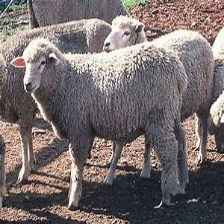

In [58]:
X_train_0_8bit

In [59]:
y_train[788]

array([0., 0., 1., 0., 0.], dtype=float32)

In [61]:
# 라벨링된 클래스명 확인
train_data.class_names

['cat', 'dog', 'sheep', 'spider', 'squirrel']

## 이미지 특징추출(전처리)
- 특징 추출 알고리즘이나 인공지능모델을 직접설계 할 수 있다(CNN 계열)
- 우리는 이미 만들어진 알고리즘을 가져다 활용할 예정(inceptionV3)

In [64]:
# 범용적인 이미지 특징 추출기 생성
imageEmbedding = InceptionV3(include_top = False,
                             weights = 'imagenet',
                             input_shape = (224,224,3), # 입력되는 이미지 모양 설정
                             pooling='avg')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [65]:
# 원래 이미지의 픽셀 최대값/최소값 확인
print("픽셀의 최대 값 : ", X_train.max())
print("픽셀의 최소 값 : ", X_train.min())

픽셀의 최대 값 :  255.0
픽셀의 최소 값 :  0.0


In [66]:
# inceptionV3가 요구하는 데이터 범위로 전처리
X_train_preprocessed = preprocess_input(X_train)

In [67]:
# 변경된 이미지의 픽셀 최대값/최소값 확인
print("픽셀의 최대 값 : ", X_train_preprocessed.max())
print("픽셀의 최소 값 : ", X_train_preprocessed.min())

픽셀의 최대 값 :  1.0
픽셀의 최소 값 :  -1.0


In [68]:
X_train_preprocessed[0]

array([[[-0.2248599 ,  0.07317924, -1.        ],
        [-0.21185005,  0.09919906, -1.        ],
        [-0.17966121,  0.1361016 , -1.        ],
        ...,
        [ 0.51351976,  0.71999526, -0.97639835],
        [ 0.49816394,  0.7269608 , -0.8787421 ],
        [ 0.49936974,  0.7411765 , -0.8194678 ]],

       [[-0.22338933,  0.07864141, -1.        ],
        [-0.21266413,  0.09285712, -1.        ],
        [-0.20180541,  0.12392986, -1.        ],
        ...,
        [ 0.5389793 ,  0.7374649 , -0.89046746],
        [ 0.52671564,  0.7385614 , -0.78398764],
        [ 0.5338235 ,  0.7491596 , -0.7165266 ]],

       [[-0.18242294,  0.11680675, -0.9733893 ],
        [-0.19232315,  0.12499344, -0.9733893 ],
        [-0.19896054,  0.13446689, -0.9733893 ],
        ...,
        [ 0.5893229 ,  0.7654433 , -0.71616334],
        [ 0.6075214 ,  0.78426564, -0.58519566],
        [ 0.6206583 ,  0.8034314 , -0.5151961 ]],

       ...,

       [[-0.10756356,  0.02576971, -0.8526616 ],
        [-0

In [73]:
# 이미지를 inceptionv3에 통과시켜서 이미지 특징추출하기
X_train_embedding = imageEmbedding.predict(X_train_preprocessed)

79/79 ━━━━━━━━━━━━━━━━━━━━ 317s 4s/step


In [74]:
X_train_embedding.shape

(2500, 2048)

## 인공신경망 설계 및 학습

In [84]:
# 인공신경망 모델 생성
my_animal_model = Sequential() # 틀(뼈대 생성)
my_animal_model.add(InputLayer(shape = (2048,))) # 신경망으로 들어오는 데이터 1개 모양 지정
my_animal_model.add(Dense(units=100, activation='relu')) # 뇌세포 100개 붙이기
my_animal_model.add(Dense(units=50, activation='relu')) # 뇌세포 50개 붙이기
my_animal_model.add(Dense(units=5, activation='softmax')) # 출력 모양 구성하기

In [85]:
# 학습방법 설정(오차함수, 최적화알고리즘 등)
my_animal_model.compile(loss="categorical_crossentropy", # 모델의 잘못된 정도(오차)를 파악하는 도구 설정
                        optimizer="Adam", # 모델의 학습 방향성(최적화)를 도와주는 도구 설정
                        metrics=['accuracy']) # 학습과정에서 발생하는 결과를 측정하는 평가지표

In [86]:
# 학습
my_animal_model.fit(X_train_embedding, # 학습시킬 문제 데이터(특징추출까지 끝난 데이터)
                    y_train, # 학습시킬 정답 데이터(원핫인코딩)
                    epochs = 20)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8391 - loss: 0.4496
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9754 - loss: 0.0817
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9612 - loss: 0.1226
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9887 - loss: 0.0274
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9902 - loss: 0.0290
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9994 - loss: 0.0041
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0028
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0010
Epoch 9/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 7.6752e-04
Epoch 10/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 4.7859e-04
Epoch 11/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 4.3177e-04
Epoch 12/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy:

## 모델평가
- fit 함수를 통해서 나오는 loss,accuracy는 훈련용데이터에 대한 평가점수이다.
- 일반화,과대적합,과소적합을 판단하려면 학습에 사용하지 않는 새로운 데이터를 맞춰보게 해야한다. (test 데이터)

In [ ]:
# 1. 테스트 데이터 압축풀기
!unzip ./data/animal_small_test.zip -d ./data/animal_test

In [88]:
# 2. 테스트 데이터 로드
test_data = image_dataset_from_directory(
  directory = "./data/animal_test", # 읽어들일 경로
  labels = "inferred", # 폴더명을 인식해서 사진마다 정답으로 붙여준다
  label_mode = "categorical", # 다중분류 정답 형태로 붙여줘라
  color_mode = 'rgb', # 컬러 색상체계로 읽어줘라
  image_size = (224,224) # 입력한 사진 크기에 맞춰 리사이징
)

Found 100 files belonging to 5 classes.


In [89]:
# 평가용 데이터가 저장될 리스트 생성
X_test = []
y_test = []

In [90]:
# 반복문을 이용해서 데이터(문제,정답) 읽기
for img, label in tqdm(test_data.as_numpy_iterator()) :
  X_test.append(img) # 32장씩 이미지를 리스트에 저장
  y_test.append(label) # 32개 정답데이터를 리스트에 저장

4it [00:00, 13.76it/s]


In [91]:
# 리스트에 담겨있는(32개씩 묶음) 데이터를 하나의 넘파이로 통합
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

X_test.shape , y_test.shape

((100, 224, 224, 3), (100, 5))

In [92]:
# 3. 전처리
# inceptionV3가 요구하는 데이터 범위로 전처리
X_test_preprocessed = preprocess_input(X_test)

In [93]:
# 이미지를 inceptionv3에 통과시켜서 이미지 특징추출하기
X_test_embedding = imageEmbedding.predict(X_test_preprocessed)

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step


In [96]:
# 모델의 예측값 만들기
y_pre = my_animal_model.predict(X_test_embedding)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [99]:
print(classification_report(y_test.argmax(1), # 실제 정답
                            y_pre.argmax(1))) # 모델의 예측 값

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.95      0.90      0.92        20
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

